C:\Users\kimi\AppData\Local\Temp\ipykernel_27536\2878741340.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


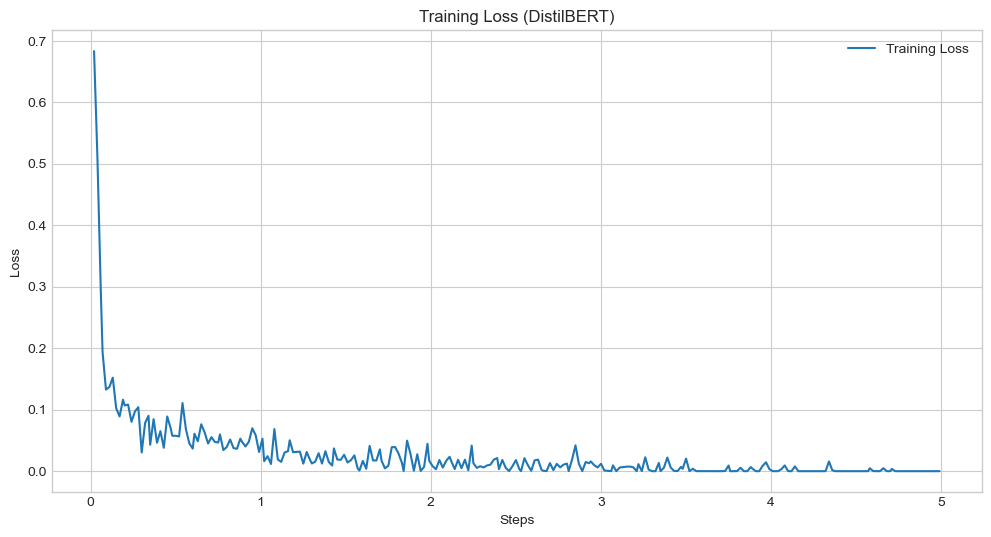

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-whitegrid')

version = 3

# Read the metrics from the CSV file
metrics_df = pd.read_csv(f'./output/version_{version}/training_metrics_{version}.csv')

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['epoch'], metrics_df['train_loss'], label='Training Loss')
plt.title('Training Loss (DistilBERT)')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


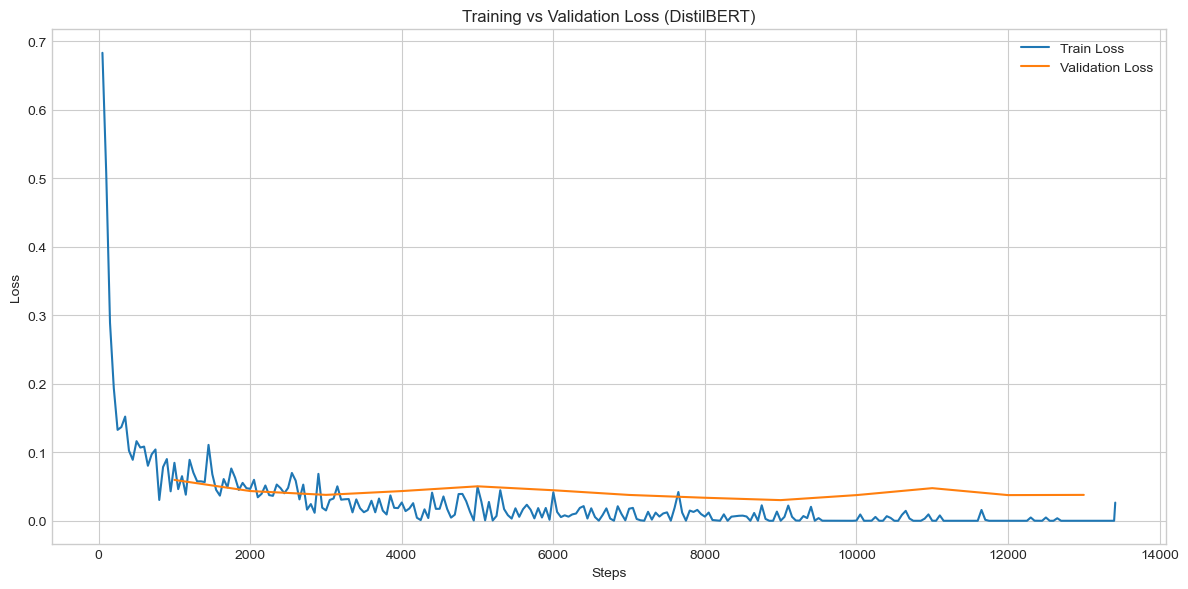

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.summary.summary_iterator import summary_iterator

# Path to your TensorFlow event file
file_path = f"./logs/version_{version}/events.out.tfevents.1703420244.DESKTOP-GO6MFA2.19124.0"  # Replace with your file path

# Initialize lists to store the extracted data
steps = []
values = []
tags = []

# Extract data from the TensorFlow event file
for e in summary_iterator(file_path):
    for v in e.summary.value:
        if v.HasField("simple_value"):
            steps.append(e.step)
            values.append(v.simple_value)
            tags.append(v.tag)

# Create a DataFrame from the extracted data
df = pd.DataFrame({"Step": steps, "Value": values, "Tag": tags})

# Separate the DataFrame into training and validation DataFrames
train_df = df[df["Tag"].str.contains("train")]
val_df = df[df["Tag"].str.contains("eval")]


plt.figure(figsize=(12, 6))
# Plot Training vs Validation Loss
plt.plot(
    train_df[train_df["Tag"].str.contains("loss")]["Step"],
    train_df[train_df["Tag"].str.contains("loss")]["Value"],
    label="Train Loss",
)
plt.plot(
    val_df[val_df["Tag"].str.contains("loss")]["Step"],
    val_df[val_df["Tag"].str.contains("loss")]["Value"],
    label="Validation Loss",
)
plt.title("Training vs Validation Loss (DistilBERT)")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()
plt.show()

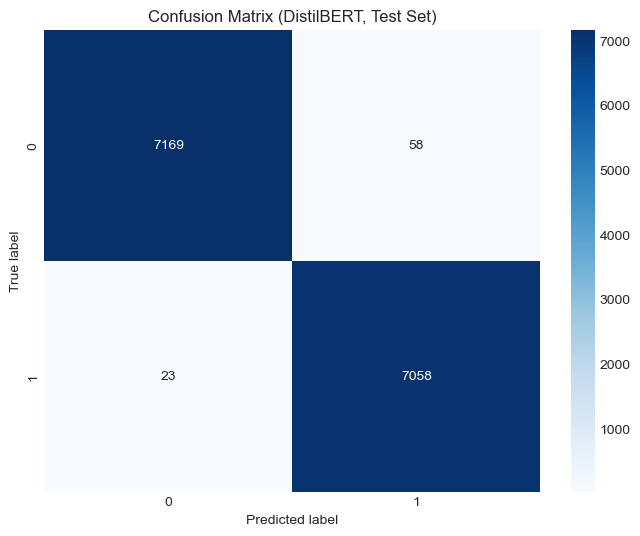

In [4]:
from sklearn.metrics import confusion_matrix

# Load confusion matrix from CSV
data = pd.read_csv(
    f"./output/version_{version}/confusion_matrix_data_{version}.csv"
)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (DistilBERT, Test Set)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()